In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import bz2
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Members of the intersection of both the 115th and 116th US Congress
# All of these members where there during the whole 2016-2020 period (both 115th & 116th congress)
congress = pd.read_csv("/content/drive/MyDrive/ADA/congress_115_116.csv")

In [ ]:
congress.head()

,Unnamed: 0,Unnamed: 0_x,fec_candidate_id,short_title_x,first_name_x,last_name_x,party_x,date_of_birth_x,gender_x,state_x,Unnamed: 0_y,short_title_y,first_name_y,last_name_y,party_y,date_of_birth_y,gender_y,state_y,speaker
0,0,0,H4LA05221,Rep.,Ralph,Abraham,R,1954-09-16,M,LA,0,Rep.,Ralph,Abraham,R,1954-09-16,M,LA,ralph abraham
1,1,1,H4NC12100,Rep.,Alma,Adams,D,1946-05-27,F,NC,1,Rep.,Alma,Adams,D,1946-05-27,F,NC,alma adams
2,2,2,H6AL04098,Rep.,Robert,Aderholt,R,1965-07-22,M,AL,2,Rep.,Robert,Aderholt,R,1965-07-22,M,AL,robert aderholt
3,3,3,H2CA31125,Rep.,Pete,Aguilar,D,1979-06-19,M,CA,3,Rep.,Pete,Aguilar,D,1979-06-19,M,CA,pete aguilar
4,4,4,H2GA12121,Rep.,Rick,Allen,R,1951-11-07,M,GA,4,Rep.,Rick,Allen,R,1951-11-07,M,GA,rick allen


In [ ]:
%%time 
# link to the Drive repo + the year of the newpapers quotes
path_to_file = '/content/drive/MyDrive/ADA/quotes-2019-congress-speakers.json.bz2'
# here the data is in the ADA folder placed at the root of your Drive

quotes_2019_congress = []
with bz2.open(path_to_file, 'rb') as s_file:
    for i, sample in enumerate(s_file):
      quote = json.loads(sample)
      quotes_2019_congress.append(quote)

CPU times: user 41.3 s, sys: 1.47 s, total: 42.8 s
Wall time: 43.1 s


In [ ]:
# Transforming the array of quotes in a pandas DataFrame
df_2019_congress = pd.DataFrame(quotes_2019_congress)
df_2019_congress.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
0,2019-06-28-043094,It is my view that the answer to their problem...,Marco Rubio,[Q324546],2019-06-28 21:54:17,1,"[[Marco Rubio, 0.7263], [None, 0.2737]]",[http://www.breitbart.com/politics/2019/06/28/...,E
1,2019-08-12-040085,It looked wonderful. I wish I was there.,Bill Johnson,"[Q16204402, Q17385655, Q17626755, Q21585452, Q...",2019-08-12 09:16:52,1,"[[Bill Johnson, 0.5411], [None, 0.4285], [Dona...",[https://www.gazettenet.com/Trump-supporters-w...,E
2,2019-11-14-054232,It may be in early December. We don't have a t...,Hakeem Jeffries,[Q5640425],2019-11-14 14:17:35,1,"[[Hakeem Jeffries, 0.487], [None, 0.4868], [Mi...",[http://www.eenews.net/stories/1061544043],E
3,2019-03-21-001139,a destroyer-type midfield boss.,Adam Smith,"[Q14950467, Q16255210, Q20023132, Q22121229, Q...",2019-03-21 19:22:00,1,"[[Adam Smith, 0.8078], [None, 0.1762], [Frank ...",[http://www.fresnobee.com/sports/article228132...,E
4,2019-06-17-001015,A fair and accurate count of every person in A...,Val Demings,[Q7909083],2019-06-17 09:00:00,1,"[[Val Demings, 0.8553], [None, 0.1447]]",[http://www.tbo.com/florida-politics/buzz/2019...,E


In [ ]:
# Counting the number of quotes by each member of the congress
df_2019_congress["speaker"].value_counts()

CPU times: user 144 ms, sys: 1.95 ms, total: 146 ms
Wall time: 145 ms


Nancy Pelosi        21287
Elizabeth Warren    21108
Lindsey Graham      10949
Cory Booker         10191
Adam Schiff         10143
                    ...  
JOHN GARAMENDI          1
mike thompson           1
TED CRUZ                1
rand paul               1
Joseph kennedy          1
Name: speaker, Length: 659, dtype: int64

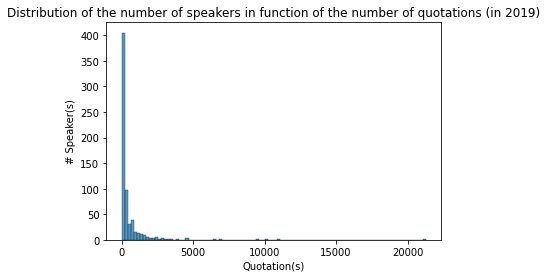

CPU times: user 646 ms, sys: 19.7 ms, total: 665 ms
Wall time: 672 ms


In [ ]:
%%time
# Distribution of the number(#) of speakers in function of the # of quotes

ax11 = sns.histplot(data = df_2019_congress["speaker"].value_counts(), bins=100)
ax11.set_title('Distribution of the number of speakers in function of the number of quotations (in 2019)')
ax11.set_ylabel('# Speaker(s)')
ax11.set_xlabel('Quotation(s)')
plt.show()